In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("bank-additional-full.csv",sep=";")
data_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Observation
1.Total of 21 columns
   * 10 numerical columns
   * 11 categorical columns

2.Total of 41188 rows

In [5]:
#Univariate Analysis of Numerical Columns
numeric_col = data_df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [6]:
numeric_col.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

In [7]:
numeric_col.tail()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  
41183          -50.8      1.028       4963.6  
41184          -50.8      1.028       4963.6  
41185          -50.8      1.028       4963.6  
41186          -50.8      1.028       4963.6  
41187          -50.8      1.028       4963.6

In [8]:
stats_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,]

stats_df

Count Missing Unique    Dtype
age             41188       0     78    int64
duration        41188       0   1544    int64
campaign        41188       0     42    int64
pdays           41188       0     27    int64
previous        41188       0      8    int64
emp.var.rate    41188       0     10  float64
cons.price.idx  41188       0     26  float64
cons.conf.idx   41188       0     26  float64
euribor3m       41188       0    316  float64
nr.employed     41188       0     11  float64

### Observation
* No Missing values in any numerical columns
* We have 5 interger columns and 5 float columns
* We have varying number of unique values per column

In [9]:
stats_df = pd.DataFrame(columns=['Mean','Mode','Median'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].mean(),data_df[column].mode().values[0],
                                data_df[column].median()]
stats_df

Mean      Mode    Median
age               40.024060    31.000    38.000
duration         258.285010    85.000   180.000
campaign           2.567593     1.000     2.000
pdays            962.475454   999.000   999.000
previous           0.172963     0.000     0.000
emp.var.rate       0.081886     1.400     1.100
cons.price.idx    93.575664    93.994    93.749
cons.conf.idx    -40.502600   -36.400   -41.800
euribor3m          3.621291     4.857     4.857
nr.employed     5167.035911  5228.100  5191.000

In [16]:
stats_df = pd.DataFrame(columns=['Min','25th_percentile','Mean','75th_percentile','Max'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].min(),data_df[column].quantile(0.25),data_df[column].mean(),data_df[column].quantile(0.75),data_df[column].max()]
stats_df    

Min  25th_percentile         Mean  75th_percentile  \
age               17.000           32.000    40.024060           47.000   
duration           0.000          102.000   258.285010          319.000   
campaign           1.000            1.000     2.567593            3.000   
pdays              0.000          999.000   962.475454          999.000   
previous           0.000            0.000     0.172963            0.000   
emp.var.rate      -3.400           -1.800     0.081886            1.400   
cons.price.idx    92.201           93.075    93.575664           93.994   
cons.conf.idx    -50.800          -42.700   -40.502600          -36.400   
euribor3m          0.634            1.344     3.621291            4.961   
nr.employed     4963.600         5099.100  5167.035911         5228.100   

                     Max  
age               98.000  
duration        4918.000  
campaign          56.000  
pdays            999.000  
previous           7.000  
emp.var.rate       1.400  
cons.price.idx    94.767  
cons.conf.idx    -26.900  
euribor3m          5.045  
nr.employed     5228.100

### Observation
* The youngest person is 17 years while the oldest is 98 years
* The average age is 40 years
* the call duration in average was 258 seconds
* The longest call lasted 4918 seconds while the lowest call lasted 0 seconds,does this mean
  no contact?
* During the campaign clients were contacted atleast once,while the most a client was contacted is 56 times
* On average clients were contacted 2 times
* Before this campaign,most clients were never contacted,while the most times a client was contacted was 7 times


In [11]:
outliers_count_df = pd.DataFrame(columns=['Outlier_Count','skewness'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(numeric_col[column]):
        Q1 = numeric_col[column].quantile(0.25)
        Q3 = numeric_col[column].quantile(0.75)
        IQR = Q3-Q1
        lower_whisker = Q1-1.5*IQR
        upper_whisker = Q3+1.5*IQR
        outliers_count_df.loc[column] = [((numeric_col[column]<lower_whisker) | (numeric_col[column] > upper_whisker)).sum(),numeric_col[column].skew()]
outliers_count_df

Outlier_Count  skewness
age                     469.0  0.784697
duration               2963.0  3.263141
campaign               2406.0  4.762507
pdays                  1515.0 -4.922190
previous               5625.0  3.832042
emp.var.rate              0.0 -0.724096
cons.price.idx            0.0 -0.230888
cons.conf.idx           447.0  0.303180
euribor3m                 0.0 -0.709188
nr.employed               0.0 -1.044262

### Observations
* We have columns with outliers,this columns seemed to be highly skewed depending on the outliers count

In [17]:
#Univariate Statistical Analysis of Categorical data
categorical_col = data_df.drop(numeric_col,axis=1)

In [18]:
stats_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mode'])
for column in categorical_col:
    stats_df.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,data_df[column].mode().values[0]]
stats_df

Count Missing Unique   Dtype               Mode
job          41188       0     12  object             admin.
marital      41188       0      4  object            married
education    41188       0      8  object  university.degree
default      41188       0      3  object                 no
housing      41188       0      3  object                yes
loan         41188       0      3  object                 no
contact      41188       0      2  object           cellular
month        41188       0     10  object                may
day_of_week  41188       0      5  object                thu
poutcome     41188       0      3  object        nonexistent
y            41188       0      2  object                 no

### Observation
* We have no missing data in the categorical columns
* The various categorical columns had varying number of unique values

In [ ]:
## Exploratory Data Analysis

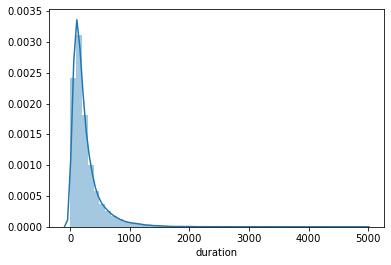

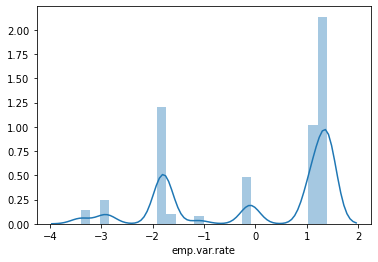

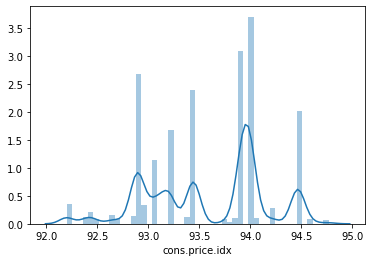

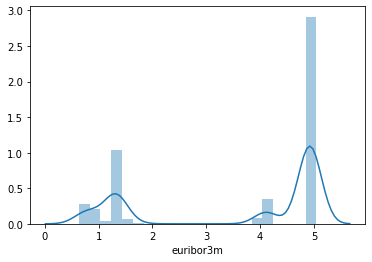

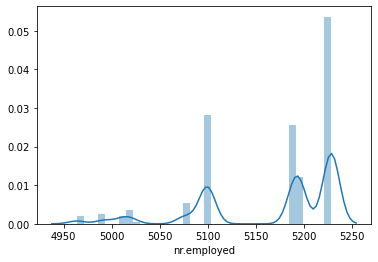

In [22]:
for i,col in enumerate(numeric_col):
    plt.figure(i)
    sns.distplot(numeric_col[col])

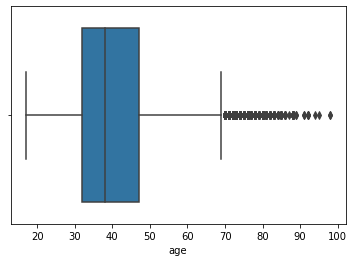

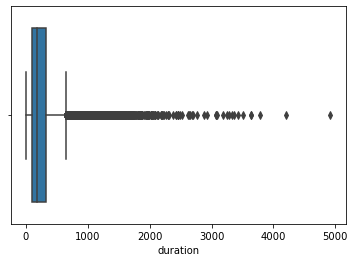

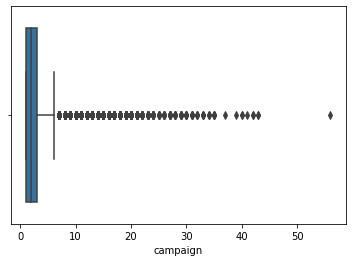

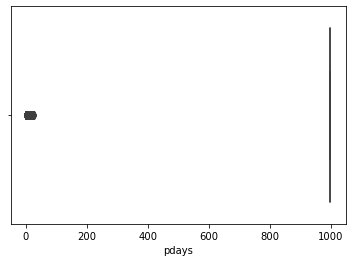

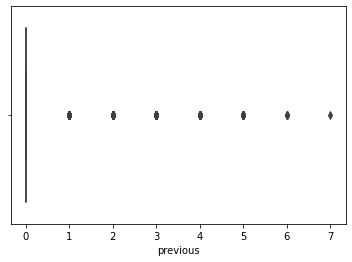

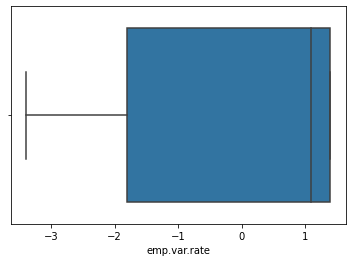

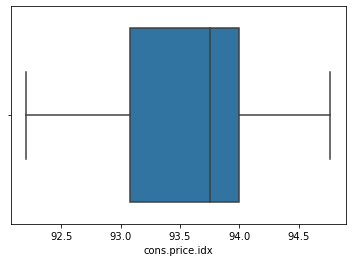

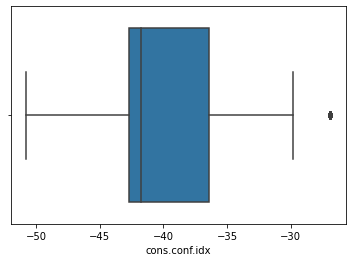

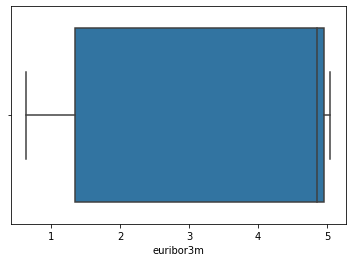

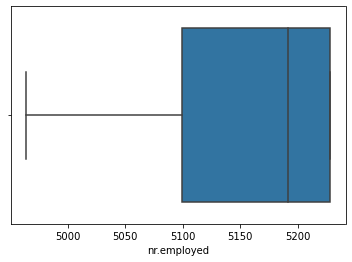

In [25]:
for i,col in enumerate(numeric_col):
    plt.figure(i)
    sns.boxplot(numeric_col[col])

#### Age
* Majority of the populations is between age 20 and 60
* We have little data on ages 80 and above
* Most people are between age 30 and 40

#### duration
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

#### campaign
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

### pdays
* This column need to be processed so that we put the 999 value as 0,from the description this 
  shows the client was never contacted
* From the plot ,it seems most clients in this campaign were never contacted

#### previous
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

### For the remaing numerical columns,we need to further analyse them

##

In [14]:
from sklearn.model_selection import train_test_split
x = data_df.drop('y',axis=1)
y = data_df['y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

ValueError: could not convert string to float: 'technician'

In [ ]:
data_df['y']